## Neural Net Training on Image Data

In [1]:
# Practice problem on DL1
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

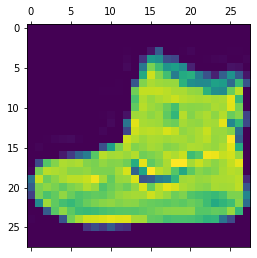

In [3]:
plt.matshow(X_train[0])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)


In [7]:
X_train_flatten.shape

(60000, 784)

In [8]:
y_train[:50]
# So 10 distinct classes as a output

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3], dtype=uint8)

In [9]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# model = keras.Sequential([
    
#     keras.layers.Dense(100,input_shape = (784,), activation = 'sigmoid'),
#     keras.layers.Dense(10,activation = 'sigmoid')
    
# ])


In [11]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'sigmoid'),
    keras.layers.Dense(50, activation = 'tanh'),
    keras.layers.Dense(10, activation = 'sigmoid')
    
])

In [12]:
model.compile(
    
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

In [13]:
model.fit(X_train_flatten,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5520 - accuracy: 0.8083
Epoch 2/10
1875/1875 [==============================] - 1s 790us/step - loss: 0.3898 - accuracy: 0.8596
Epoch 3/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.3546 - accuracy: 0.8714
Epoch 4/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.3341 - accuracy: 0.8797
Epoch 5/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.3173 - accuracy: 0.8841
Epoch 6/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.3047 - accuracy: 0.8882
Epoch 7/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.2909 - accuracy: 0.8929
Epoch 8/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.2829 - accuracy: 0.8960
Epoch 9/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.2721 - accuracy: 0.8994
Epoch 10/10
1875/1875 [==============================] - 2s 812us/

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 975us/step - loss: 0.3356 - accuracy: 0.8792


[0.33556896448135376, 0.8791999816894531]

In [15]:
y_predict = model.predict(X_test_flatten)
y_predict[0]

array([0.0459494 , 0.06571409, 0.27887326, 0.11514348, 0.2763143 ,
       0.9846722 , 0.09863141, 0.99616015, 0.1523284 , 0.9999718 ],
      dtype=float32)

In [16]:
y_predict = [np.argmax(i) for i in y_predict]

In [17]:
y_predict[0]

9

In [18]:
y_test[0]

9

In [19]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predict)

In [20]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[868,   0,   9,  23,   1,   1,  91,   0,   7,   0],
       [  3, 967,   1,  19,   3,   0,   7,   0,   0,   0],
       [ 20,   1, 784,  18,  92,   0,  85,   0,   0,   0],
       [ 34,   5,  12, 899,  21,   1,  27,   0,   1,   0],
       [  0,   1,  99,  40, 782,   0,  78,   0,   0,   0],
       [  0,   0,   0,   1,   0, 941,   0,  33,   3,  22],
       [151,   1,  77,  31,  60,   0, 675,   0,   5,   0],
       [  0,   0,   0,   0,   0,  16,   0, 957,   0,  27],
       [  4,   0,   3,   8,   3,   1,  15,   6, 960,   0],
       [  0,   0,   0,   0,   0,   6,   2,  33,   0, 959]])>

<AxesSubplot:>

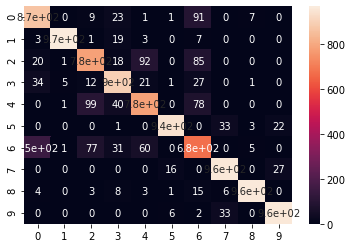

In [21]:
import seaborn as sn
sn.heatmap(cm,annot=True)